# Effective Graph Paper
Code to generate "SI Figure - Spreading bio-random comparison"

In [9]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.rm'] = 'serif'
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [11]:
dfB = pd.read_csv('../Figure 2/BioNetworkEdgeEffectiveness.csv')

In [12]:
dfBR = pd.read_csv('../Figure 2/BioNetworkRandomEnsembleEdgeEffectiveness.csv', index_col=0)

,BioBN,Node,Bias,Degree,Input,EC,ECgini
0,0,abl,0.75,2,0,0.625,0.0
1,0,abl,0.75,2,1,0.625,0.0
2,0,akap79,0.50,1,0,1.000,0.0
3,0,ap1,0.25,2,0,0.625,0.0
4,0,ap1,0.25,2,1,0.625,0.0
...,...,...,...,...,...,...,...
2919,Leukemia,IL15,0.50,1,0,1.000,0.0
2920,Leukemia,Stimuli,0.50,1,0,1.000,0.0
2921,Leukemia,Stimuli2,0.50,1,0,1.000,0.0
2922,Leukemia,CD45,0.50,1,0,1.000,0.0


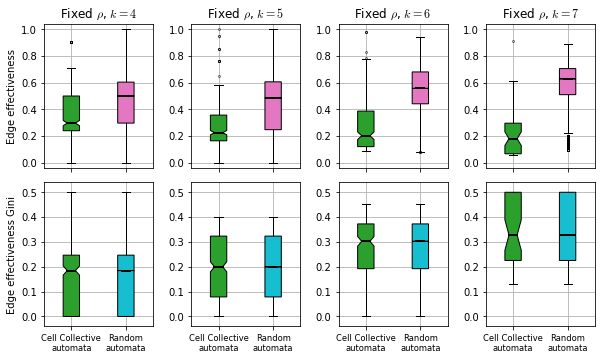

In [37]:
fig = plt.figure(constrained_layout=False, figsize=(8.5,5))
gs = gridspec.GridSpec(ncols=4, nrows=2, figure=fig)
#
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[0, 1])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[0, 2])
ax6 = fig.add_subplot(gs[1, 2])
ax7 = fig.add_subplot(gs[0, 3])
ax8 = fig.add_subplot(gs[1, 3])
axes = [(ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)]
#
flierprops = dict(marker='o', markersize=2, markeredgecolor='black', markeredgewidth=.5, rasterized=False)
medianprops = dict(color='black')

for (axt, axb), degree in zip(axes, [4, 5, 6, 7]):
#
    dfBt = dfB.loc[dfB['Degree'] == degree, :]
    dfBRt = dfBR.loc[dfBR['Degree'] == degree, :]
    #
    res = axt.boxplot([dfBt['EC'], dfBRt['EC']], notch=True, patch_artist=True, widths=0.3, flierprops=flierprops)

    colors = ['#2ca02c', '#e377c2']
    for box, median, color in zip(res['boxes'], res['medians'], colors):
        box.set_facecolor(color)
        median.set_c('k')
        median.set_lw(2)


    axt.set_xticks(range(1,3))
    axt.set_xticklabels([]) #'Cell Collective\nautomata', 'Random\nautomata'])
    axt.set_title(r"Fixed $\rho$, $k={k:d}$".format(k=degree))
    axt.grid()
    axt.set_ylim(-0.04, 1.04)


    res = axb.boxplot([dfBt['ECgini'], dfBRt['ECgini']], notch=True, patch_artist=True, widths=0.3, flierprops=flierprops)

    colors = ['#2ca02c', '#17becf']
    for box, median, color in zip(res['boxes'], res['medians'], colors):
        box.set_facecolor(color)
        median.set_c('k')
        median.set_lw(2)

    axb.set_xticks(range(1,3))
    axb.set_xticklabels(['Cell Collective\nautomata', 'Random\nautomata'], fontsize='small')
    #axb.set_title(r"Fixed bias with hard constraint and $k>1$")
    axb.grid()
    axb.set_ylim(-0.04,0.54)

#
ax1.set_ylabel('Edge effectiveness')
ax2.set_ylabel('Edge effectiveness Gini')
#
plt.subplots_adjust(left=0.08, right=0.98, bottom=0.08, top=0.92, wspace=0.35, hspace=0.1)
plt.savefig("SI-EdgeEffectivenessComposite.pdf")
plt.show()